## 30 分类图 （Categorical Plots）
由 seaborn库 提供的分类图可用于可视化彼此相关的2个或更多分类变量的计数分布。

In [1]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.3.3
0.11.0


In [2]:
# Load Dataset
titanic = sns.load_dataset("titanic")
# titanic = pd.read_csv("datasets/titanic.csv")  # ?？？ 数据源问题
titanic["Pclass"] = pd.Categorical(titanic["Pclass"], ["First", "Second", "Third"])
titanic["deck"] = pd.Categorical(titanic["deck"], list("ABCDEFG")) ## ?？？ 数据源问题，丢失。无法确定这是那一列

# Plot
g = sns.catplot("alive", col="deck", col_wrap=4,
                data=titanic[titanic.deck.notnull()],
                kind="count", height=3.5, aspect=.8,
                palette='tab20')

fig.suptitle('sf')
plt.show()

URLError: <urlopen error [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。>

In [4]:
# Load Dataset
# titanic = sns.load_dataset("titanic")## ?？？ 数据源问题，丢失。无法确定这是那一列
titanic = pd.read_csv("datasets/titanic.csv")  # ?？？ 数据源问题

In [5]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


In [6]:
titanic.Pclass.astype('category').cat.rename_categories(["First", "Second", "Third"])

0      Third
1      First
2      Third
3      First
4      Third
       ...  
151    First
152    Third
153    Third
154    Third
155    First
Name: Pclass, Length: 156, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

d:\datacenterkun\jupyter\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


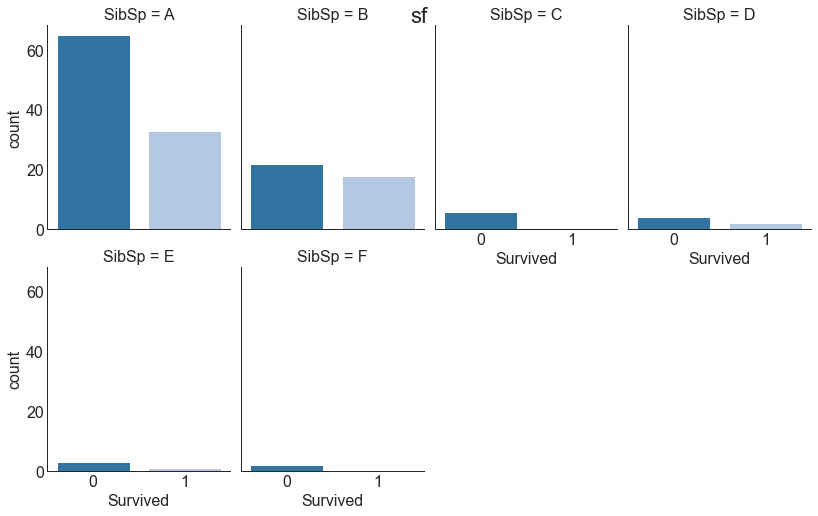

In [7]:

titanic["Pclass"] = titanic["Pclass"].astype('category').cat.rename_categories(["First", "Second", "Third"])  # class--> Pclass
# titanic["deck"] = pd.Categorical(titanic["deck"], list("ABCDEFG")) ## ?？？ 数据源问题，丢失。无法确定这是那一列
titanic["SibSp"] = titanic["SibSp"].astype(pd.CategoricalDtype()).cat.rename_categories(list("ABCDEF")) ## ?？？ 数据源问题，丢失。无法确定这是那一列.deck --> SibSp
# Plot
g = sns.catplot("Survived", col="SibSp", col_wrap=4,
                data=titanic[titanic.SibSp.notnull()],
                kind="count", height=3.5, aspect=.8,
                palette='tab20')

plt.suptitle('sf')
plt.show()

In [8]:
# Load Dataset
# titanic = sns.load_dataset("titanic") # ?？？ 数据源问题，丢失。无法确定这是那一列。见后文

# Plot
sns.catplot(x="age", y="embark_town",
            hue="sex", col="class",
            data=titanic[titanic.embark_town.notnull()],
            orient="h", height=5, aspect=1, palette="tab10",
            kind="violin", dodge=True, cut=0, bw=.2)

AttributeError: 'DataFrame' object has no attribute 'embark_town'

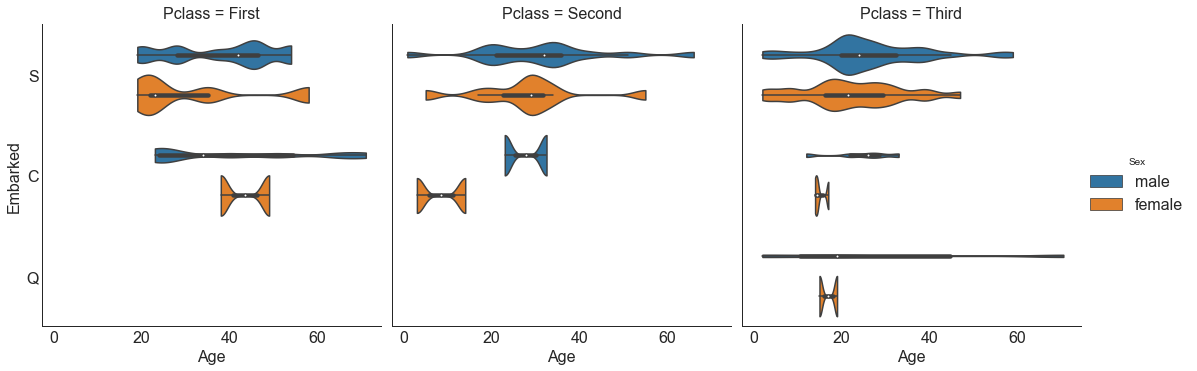

In [9]:


# Plot
sns.catplot(x="Age", y="Embarked",
            hue="Sex", col="Pclass",
            data=titanic[titanic.Embarked.notnull()],
            orient="h", height=5, aspect=1, palette="tab10",
            kind="violin", dodge=True, cut=0, bw=.2)